In [17]:
import numpy as np, pandas as pd, tensorflow as tf

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')

X = df.drop(columns=['Date', 'Adj Close', 'Volume'])
y = df['Close']

In [18]:
X_size = int(len(X) * 0.8)
X_train_data = np.array(X[0 : X_size])
X_test_data = np.array(X[X_size : len(X)])

y_size = int(len(y) * 0.8)
y_train_data = np.array(y[0 : y_size])
y_test_data = np.array(y[y_size : len(y)])

In [19]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_data = X_scaler.fit_transform(X_train_data)
X_test_data = X_scaler.transform(X_test_data)
y_train_data = y_scaler.fit_transform(y_train_data.reshape(-1, 1))
y_test_data = y_scaler.transform(y_test_data.reshape(-1, 1))

In [34]:
window = 12
X_train, y_train = [], []
for i in range(len(X_train_data)-window):
    X_train.append(X_train_data[i:i+window])
    y_train.append(y_train_data[i+window])
X_train, y_train = np.array(X_train), np.array(y_train)

In [35]:
X_test, y_test = [], []
for i in range(len(X_test_data)-window):
    X_test.append(X_test_data[i:i+window])
    y_test.append(y_test_data[i+window])
X_test, y_test = np.array(X_test), np.array(y_test)

In [36]:
model_RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,4)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model_RNN.compile(optimizer='adam', loss='mse')
model_RNN.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0578
Epoch 2/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 7.0989e-04
Epoch 3/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.5568e-04
Epoch 4/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.6904e-04
Epoch 5/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.2383e-04
Epoch 6/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.1065e-04
Epoch 7/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.4582e-04
Epoch 8/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.1771e-04
Epoch 9/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 6.6001e-04
Epoch 10/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.8081e-04
Epoch 11/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.2815e-04
Epoch 12/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.9756e-04
Epoch 13/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.0884e-04
Epoch 14/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.2226e-04
Epoch

In [38]:
RNN_y_pred = model_RNN.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


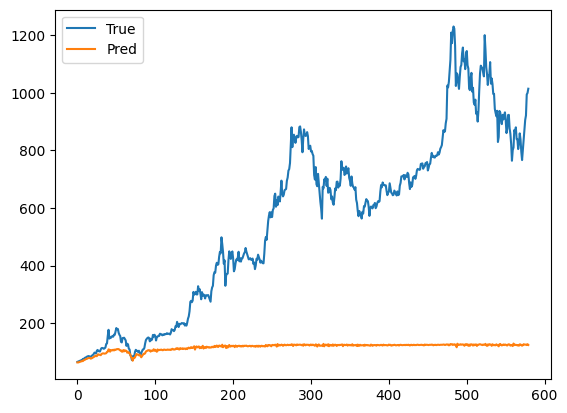

In [39]:
import matplotlib.pyplot as plt

plt.plot(y_scaler.inverse_transform(y_test), label='True')
plt.plot(y_scaler.inverse_transform(RNN_y_pred), label='Pred')
plt.legend(); plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

print('평균제곱근오차', mean_squared_error(RNN_y_pred, y_test))

평균제곱근오차 52.471298473720836


In [41]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,4)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model_LSTM.compile(optimizer='adam', loss='mse')
model_LSTM.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0386
Epoch 2/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.7861e-04
Epoch 3/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.7156e-04
Epoch 4/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.8092e-04
Epoch 5/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.2424e-04
Epoch 6/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.7234e-04
Epoch 7/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.3653e-04
Epoch 8/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.9565e-04
Epoch 9/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.8746e-04
Epoch 10/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.6887e-04
Epoch 11/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.6895e-04
Epoch 12/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.9341e-04
Epoch 13/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.2870e-04
Epoch 14/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.0281e-04
Epoch

In [43]:
LSTM_y_pred = model_LSTM.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


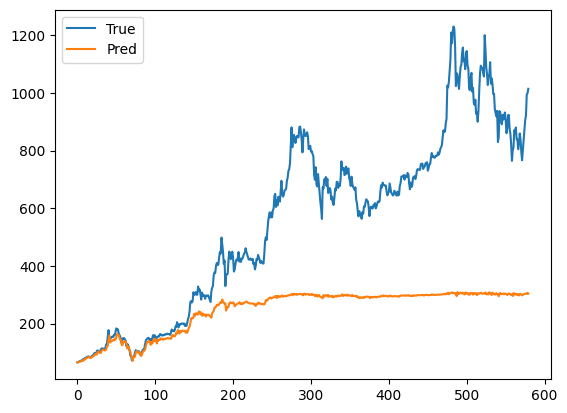

In [44]:
plt.plot(y_scaler.inverse_transform(y_test), label='True')
plt.plot(y_scaler.inverse_transform(LSTM_y_pred), label='Pred')
plt.legend(); plt.show()

In [45]:
print('평균제곱근오차', mean_squared_error(LSTM_y_pred, y_test))

평균제곱근오차 29.0713572651266
